Codes done by **Yifan Qin** (<url>yqin092@uottawa.ca</url>) at: 

<url>https://colab.research.google.com/drive/1OniUG7P2u4veiMInxAxWDru7BHsxAjJV?usp=sharing</url>

## Section 1: Environment Setup

In [1]:
# Check cuda
import torch
cuda_available = False
if (hasattr(torch, 'cuda')):
    cuda_available = torch.cuda.is_available()
print("CUDA available: ", cuda_available)

CUDA available:  False


## Section 2: Import Libraries

In [2]:
# Basic Python Library
import sys
import time
import math
import random
from collections import Counter
import collections
from typing import List, Tuple, Dict, Set, Union

# Numpy, Pandas and Tensor
import numpy as np
import tensorflow as tf
import torch
import pandas as pd

# plot
import matplotlib.pyplot as plt

# os
import os

# joblib
import joblib

# sklearn
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
from sklearn.metrics import classification_report, f1_score, accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from collections import defaultdict

## Section 3: Import Dataset

In [3]:
ROOT = os.path.join(
    os.path.dirname(os.path.abspath(os.path.dirname(os.curdir))),
    'Project'
)

In [4]:
# data path
raw_data_path_1 = os.path.join(
    ROOT,
    'content',
    'train.csv'
)

# read a csv file
raw_dataset_1 = pd.read_csv(raw_data_path_1)

# display dataset
raw_dataset_1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,45,0


In [5]:
# data path
raw_data_path_2 = os.path.join(
    ROOT,
    'content',
    'test.csv'
)

# read a csv file
raw_dataset_2 = pd.read_csv(raw_data_path_2)

# display dataset
raw_dataset_2

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61
...,...,...,...,...,...,...,...,...,...,...,...,...
23485,53478,Legal,region_2,Below Secondary,m,sourcing,1,24,3.0,1,0,61
23486,25600,Technology,region_25,Bachelor's,m,sourcing,1,31,3.0,7,0,74
23487,45409,HR,region_16,Bachelor's,f,sourcing,1,26,4.0,4,0,50
23488,1186,Procurement,region_31,Bachelor's,m,sourcing,3,27,NaN,1,0,70


## Section 4: Pre-Processing

### 4.1 Training Dataset

In [6]:
# dataset information
raw_dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  awards_won?           54808 non-null  int64  
 11  avg_training_score    54808 non-null  int64  
 12  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.4+ MB


In [7]:
print(f"The total number of data in the dataset is: {raw_dataset_1.shape[0]}")

new_dataset_11 = raw_dataset_1.dropna().copy()
print(f"The total number of data after clean n/a in the dataset is: {new_dataset_11.shape[0]}")

new_dataset_12 = new_dataset_11.drop_duplicates().copy()
print(f"The total number of data after clean duplicates in the dataset is: {new_dataset_12.shape[0]}")

dataset_1 = new_dataset_12.copy()
print(f"The total number of data in the final dataset is: {dataset_1.shape[0]}")

The total number of data in the dataset is: 54808
The total number of data after clean n/a in the dataset is: 48660
The total number of data after clean duplicates in the dataset is: 48660
The total number of data in the final dataset is: 48660


In [8]:
# display dataset
dataset_1

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,0,79,0


In [9]:
# dataset information
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48660 entries, 0 to 54807
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           48660 non-null  int64  
 1   department            48660 non-null  object 
 2   region                48660 non-null  object 
 3   education             48660 non-null  object 
 4   gender                48660 non-null  object 
 5   recruitment_channel   48660 non-null  object 
 6   no_of_trainings       48660 non-null  int64  
 7   age                   48660 non-null  int64  
 8   previous_year_rating  48660 non-null  float64
 9   length_of_service     48660 non-null  int64  
 10  awards_won?           48660 non-null  int64  
 11  avg_training_score    48660 non-null  int64  
 12  is_promoted           48660 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 5.2+ MB


In [10]:
# describe dataset
dataset_1.describe()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
count,48660.000000,48660.000000,48660.000000,48660.000000,48660.00000,48660.00000,48660.000000,48660.000000
mean,39169.271681,1.251993,35.589437,3.337526,6.31157,0.02314,63.603309,0.086971
std,22630.461554,0.604994,7.534571,1.257922,4.20476,0.15035,13.273502,0.281795
min,1.000000,1.000000,20.000000,1.000000,1.00000,0.00000,39.000000,0.000000
25%,19563.500000,1.000000,30.000000,3.000000,3.00000,0.00000,51.000000,0.000000
50%,39154.000000,1.000000,34.000000,3.000000,5.00000,0.00000,60.000000,0.000000
75%,58788.250000,1.000000,39.000000,4.000000,8.00000,0.00000,76.000000,0.000000
max,78298.000000,10.000000,60.000000,5.000000,37.00000,1.00000,99.000000,1.000000


In [11]:
# output distribution
print(dataset_1['is_promoted'].value_counts())

is_promoted
0    44428
1     4232
Name: count, dtype: int64


In [12]:
# sensitive attribute distribution
print(dataset_1['gender'].value_counts())

gender
m    33852
f    14808
Name: count, dtype: int64


In [13]:
# Explore sensitive attribute input -- 1

def value_counts_by_output_class(fet, dataset_999 = dataset_1):

    temp1 = dataset_999[dataset_999["is_promoted"] == 0][fet].value_counts(ascending=False)

    print(str(fet) + " vs class 0 (No Promoted)")
    print(temp1)
    print("\n")

    temp2 = dataset_999[dataset_999["is_promoted"] == 1][fet].value_counts(ascending=False)
    print(str(fet) + " vs class 1 (Promoted)")
    print(temp2)
    print("\n")


# Change here to explore all the discrete input features to determine which input feature that we will use later
value_counts_by_output_class("gender", dataset_1)

gender vs class 0 (No Promoted)
gender
m    30983
f    13445
Name: count, dtype: int64


gender vs class 1 (Promoted)
gender
m    2869
f    1363
Name: count, dtype: int64




In [14]:
# Explore sensitive attribute input -- 2

def value_counts_by_output_class(fet, dataset_999 = dataset_1):

    temp1 = dataset_999[dataset_999[fet] == "m"]["is_promoted"].value_counts(ascending=False)

    print("is_promoted" + " vs Gender (Male)")
    print(temp1)
    print("\n")

    temp2 = dataset_999[dataset_999[fet] == "f"]["is_promoted"].value_counts(ascending=False)
    print("is_promoted" + " vs Gender (Female)")
    print(temp2)
    print("\n")


# Change here to explore all the discrete input features to determine which input feature that we will use later
value_counts_by_output_class("gender", dataset_1)

is_promoted vs Gender (Male)
is_promoted
0    30983
1     2869
Name: count, dtype: int64


is_promoted vs Gender (Female)
is_promoted
0    13445
1     1363
Name: count, dtype: int64




## Section 5: Create Input Matrix X

In [15]:
n = len(dataset_1)
print(n)

48660


In [16]:
# Continuous
selected_features_1 = ['age', 'avg_training_score']

# Discrete
selected_features_2 = ['department', 'region', 'education', 'recruitment_channel', 'no_of_trainings', 'previous_year_rating', 'length_of_service', 'awards_won?']

# Sensitive Attribute
sensitive_features = ['gender']

print(len(selected_features_1))
print(len(selected_features_2))

2
8


In [17]:
# Save a list of features 
features = selected_features_1 + selected_features_2 + sensitive_features
print(len(features))
joblib.dump(features, os.path.join(ROOT, 'content', 'features.pkl'))

11


['c:\\Data\\Canada\\Study\\masters\\CSI5195 - Ethics in AI\\Project\\content\\features.pkl']

In [18]:
input_b = np.ones([n, 1])
input_X_0 = dataset_1[sensitive_features]
input_X_1 = dataset_1[selected_features_1]
input_X = np.concatenate((input_b, input_X_1), axis = 1)

output_Y = dataset_1[['gender','is_promoted']].to_numpy()


print(input_X.shape)
print(output_Y.shape)

(48660, 3)
(48660, 2)


In [19]:
print(type(input_X))
print(type(output_Y))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [20]:
data_total_0 = input_X
print(data_total_0.shape)

for i in selected_features_2:
    data_1 =  np.array(dataset_1[[i]])
    list_1 = data_1.tolist()

    list_1_new = []
    mapping_list_1 = {}

    for j in range(len(list_1)):
        if list_1[j][0] not in list_1_new:
            list_1_new.append(list_1[j][0])
        if list_1[j][0] not in mapping_list_1:
            mapping_list_1[list_1[j][0]] = len(mapping_list_1)


    for k in list_1_new:
        data_new = (data_1 == k).astype(int)
        data_total_0 = np.concatenate((data_total_0, data_new), axis = 1)

    print(data_total_0.shape)

data_total = np.concatenate((input_X_0, data_total_0), axis = 1)
print(data_total.shape)

(48660, 3)
(48660, 12)
(48660, 46)
(48660, 49)
(48660, 52)
(48660, 62)
(48660, 67)
(48660, 102)
(48660, 104)
(48660, 105)


In [21]:
print(data_total.shape)
print(output_Y.shape)

(48660, 105)
(48660, 2)


In [22]:
print(data_total)
print(output_Y)

[['f' 1.0 35.0 ... 0.0 1.0 0.0]
 ['m' 1.0 30.0 ... 0.0 1.0 0.0]
 ['m' 1.0 34.0 ... 0.0 1.0 0.0]
 ...
 ['f' 1.0 37.0 ... 0.0 1.0 0.0]
 ['m' 1.0 27.0 ... 0.0 1.0 0.0]
 ['m' 1.0 27.0 ... 0.0 1.0 0.0]]
[['f' 0]
 ['m' 0]
 ['m' 0]
 ...
 ['f' 0]
 ['m' 0]
 ['m' 0]]


## Section 6: Split Dataset and Normalization

In [23]:
X_train, X_test, t_train, t_test = train_test_split(data_total, output_Y, test_size=0.2, random_state=66)

# female: 1      male: 0
X_train[:, 0] = (X_train[:, 0] == 'f').astype(int)
t_train[:, 0] = (t_train[:, 0] == 'f').astype(int)

X_test[:, 0] = (X_test[:, 0] == 'f').astype(int)
t_test[:, 0] = (t_test[:, 0] == 'f').astype(int)

In [24]:
mean = X_train[:, 2:4].astype(float).mean(axis=0)
std  = X_train[:, 2:4].astype(float).std(axis=0)

X_train_norm = X_train.copy()
X_test_norm = X_test.copy()

X_train_norm[:, 2:4] = (X_train[:, 2:4] - mean) / std
X_test_norm[:, 2:4] = (X_test[:, 2:4] - mean) / std


print(X_train_norm[:, 2:4].astype(float).mean(axis=0)) # Should be all very close to 0
print(X_train_norm[:, 2:4].astype(float).std(axis=0))  # Should be all very close to 1
print(X_test_norm[:, 2:4].astype(float).mean(axis=0)) # Should be close to 0
print(X_test_norm[:, 2:4].astype(float).std(axis=0))  # Should be close to 1

[-3.05568011e-16  1.73058809e-16]
[1. 1.]
[0.0182774  0.00047963]
[1.01642833 0.99651151]


In [25]:
X_train_no_gender = X_train_norm[:, 1:].astype(float)
X_test_no_gender = X_test_norm[:, 1:].astype(float)

t_train_gender = t_train[:, 0].astype(float)
t_test_gender  = t_test[:, 0].astype(float)

t_train_no_gender = t_train[:, 1].astype(float)
t_test_no_gender = t_test[:, 1].astype(float)

print(X_train_norm.shape)
print(X_test_norm.shape)
print(t_train.shape)
print(t_test.shape)

print("\n")
print(X_train_no_gender.shape)
print(X_test_no_gender.shape)

print("\n")
print(t_train_gender.shape)
print(t_test_gender.shape)
print(t_train_no_gender.shape)
print(t_test_no_gender.shape)

(38928, 105)
(9732, 105)
(38928, 2)
(9732, 2)


(38928, 104)
(9732, 104)


(38928,)
(9732,)
(38928,)
(9732,)


In [26]:
print(np.isnan(X_train_no_gender).any())
print(np.isinf(X_train_no_gender).any())
print(np.isnan(X_test_no_gender).any())
print(np.isinf(X_test_no_gender).any())

print(np.isnan(t_train_no_gender).any())
print(np.isinf(t_train_no_gender).any())
print(np.isnan(t_test_no_gender).any())
print(np.isinf(t_test_no_gender).any())

False
False
False
False
False
False
False
False


In [27]:
print(X_train_no_gender)
print(t_train_gender)
print(t_train_no_gender)

[[ 1.          0.05832828  0.9333976  ...  0.          1.
   0.        ]
 [ 1.         -0.20800251  0.40639313 ...  0.          1.
   0.        ]
 [ 1.          0.45782446 -0.94876122 ...  0.          1.
   0.        ]
 ...
 [ 1.          0.72415526 -0.04532498 ...  0.          1.
   0.        ]
 [ 1.         -0.47433331  1.46040207 ...  0.          1.
   0.        ]
 [ 1.         -1.00699489  1.61097478 ...  0.          1.
   0.        ]]
[1. 0. 0. ... 1. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]


In [28]:
print(X_test_no_gender)
print(t_test_gender)
print(t_test_no_gender)

[[ 1.         -0.07483712 -0.19589769 ...  0.          1.
   0.        ]
 [ 1.         -0.7406641   0.48167949 ...  0.          1.
   0.        ]
 [ 1.         -0.6074987  -1.02404757 ...  0.          1.
   0.        ]
 ...
 [ 1.         -0.7406641  -0.72290216 ...  0.          1.
   0.        ]
 [ 1.         -1.53965647 -1.17462028 ...  0.          1.
   0.        ]
 [ 1.         -0.87382949  1.83683384 ...  0.          1.
   0.        ]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 1.]


In [29]:
# Save Labels
np.save(os.path.join(ROOT, "content", "y_train_gender.npy"), t_train_gender)
np.save(os.path.join(ROOT, "content", "y_train_no_gender.npy"), t_train_no_gender)
np.save(os.path.join(ROOT, "content", "y_test_gender.npy"), t_test_gender)
np.save(os.path.join(ROOT, "content", "y_test_no_gender.npy"), t_test_no_gender)

In [30]:
new_df_0 = pd.DataFrame({
    'gender': X_train_norm[:, 0],
    'is_promoted': t_train_no_gender
})

# Promotion Distribution in Train Dataset
print("is_promoted vs Gender (Male):")
print(new_df_0[new_df_0['gender'] == 0]['is_promoted'].value_counts())

print("\nis_promoted vs Gender (Female):")
print(new_df_0[new_df_0['gender'] == 1]['is_promoted'].value_counts())

# Gender Distribution in Train Dataset
print("\ngender vs class 0 (No Promoted):")
print(new_df_0[new_df_0['is_promoted'] == 0]['gender'].value_counts())

print("\ngender vs class 1 (Promoted):")
print(new_df_0[new_df_0['is_promoted'] == 1]['gender'].value_counts())

is_promoted vs Gender (Male):
is_promoted
0.0    24818
1.0     2277
Name: count, dtype: int64

is_promoted vs Gender (Female):
is_promoted
0.0    10721
1.0     1112
Name: count, dtype: int64

gender vs class 0 (No Promoted):
gender
0    24818
1    10721
Name: count, dtype: int64

gender vs class 1 (Promoted):
gender
0    2277
1    1112
Name: count, dtype: int64


In [31]:
new_df_1 = pd.DataFrame({
    'gender': X_test_norm[:, 0],
    'is_promoted': t_test_no_gender
})

# Promotion Distribution in Test Dataset
print("is_promoted vs Gender (Male):")
print(new_df_1[new_df_1['gender'] == 0]['is_promoted'].value_counts())

print("\nis_promoted vs Gender (Female):")
print(new_df_1[new_df_1['gender'] == 1]['is_promoted'].value_counts())

# Gender Distribution in Test Dataset
print("\ngender vs class 0 (No Promoted):")
print(new_df_1[new_df_1['is_promoted'] == 0]['gender'].value_counts())

print("\ngender vs class 1 (Promoted):")
print(new_df_1[new_df_1['is_promoted'] == 1]['gender'].value_counts())

is_promoted vs Gender (Male):
is_promoted
0.0    6165
1.0     592
Name: count, dtype: int64

is_promoted vs Gender (Female):
is_promoted
0.0    2724
1.0     251
Name: count, dtype: int64

gender vs class 0 (No Promoted):
gender
0    6165
1    2724
Name: count, dtype: int64

gender vs class 1 (Promoted):
gender
0    592
1    251
Name: count, dtype: int64


In [32]:
# Save the Data
np.save(os.path.join(ROOT, "content", "X_train_no_gender.npy"), X_train_no_gender)
np.save(os.path.join(ROOT, "content", "X_test_no_gender.npy"), X_test_no_gender)
np.save(os.path.join(ROOT, "content", "X_train_norm.npy"), X_train_norm)
np.save(os.path.join(ROOT, "content", "X_test_norm.npy"), X_test_norm)

## Section 7: Build model by Sklearn

In [33]:
# Runtime: 60 minute
model_1 = MLPClassifier(random_state=88)

param_model_1 = {
    'hidden_layer_sizes': [(128, 64, 32), (64, 32), (128, ), (256, 128)]
}

new_model_1 = GridSearchCV(model_1, param_model_1, cv=10, scoring='accuracy')
new_model_1.fit(X_train_no_gender, t_train_no_gender)

print(f"Best parameters for model 1 (MLP): {new_model_1.best_params_}")
print(f"Best score for model 1 (MLP): {new_model_1.best_score_}")

c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: M

Best parameters for model 1 (MLP): {'hidden_layer_sizes': (128,)}
Best score for model 1 (MLP): 0.9249124446360492


c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
# Runtime: 30 minute
model_2 = MLPClassifier(max_iter=1000, random_state=88)

param_model_2 = {
    'activation': ['tanh', 'relu']
}

new_model_2 = GridSearchCV(model_2, param_model_2, cv=10, scoring='accuracy')
new_model_2.fit(X_train_no_gender, t_train_no_gender)

print(f"Best parameters for model 2 (MLP): {new_model_2.best_params_}")
print(f"Best score for model 2 (MLP): {new_model_2.best_score_}")

Best parameters for model 2 (MLP): {'activation': 'relu'}
Best score for model 2 (MLP): 0.9165898868736649


In [35]:
# Runtime: 20 minute
model_3 = MLPClassifier(max_iter=1000, random_state=88)

param_model_3 = {
    'learning_rate_init': [0.0001, 0.001, 0.01]
}

new_model_3 = GridSearchCV(model_3, param_model_3, cv=10, scoring='accuracy')
new_model_3.fit(X_train_no_gender, t_train_no_gender)

print(f"Best parameters for model 3 (MLP): {new_model_3.best_params_}")
print(f"Best score for model 3 (MLP): {new_model_3.best_score_}")

Best parameters for model 3 (MLP): {'learning_rate_init': 0.0001}
Best score for model 3 (MLP): 0.9376028046228388


### Train Model

c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model MLP has been trained with the best parameters
Training time: 41.67 seconds


Overall Performance:
Accuracy: 0.9193382655158241


              precision    recall  f1-score   support

         0.0     0.9438    0.9694    0.9564      8889
         1.0     0.5482    0.3915    0.4567       843

    accuracy                         0.9193      9732
   macro avg     0.7460    0.6804    0.7066      9732
weighted avg     0.9095    0.9193    0.9132      9732



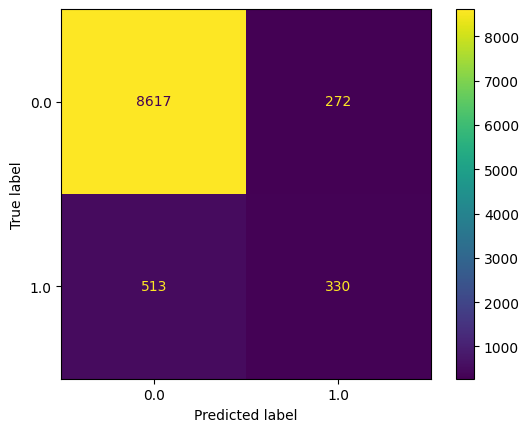

In [36]:
final_model_1 = MLPClassifier(activation='relu', hidden_layer_sizes=(128,), learning_rate_init=0.001, random_state=88)

start_time = time.time()
final_model_1.fit(X_train_no_gender, t_train_no_gender)
end_time = time.time()

print("Model MLP has been trained with the best parameters")
print(f"Training time: {end_time - start_time:.2f} seconds")

# Ensure the directory exists
model_dir = os.path.join(ROOT, 'models')
os.makedirs(model_dir, exist_ok=True)

# Save the model
joblib.dump(final_model_1, os.path.join(model_dir, 'model_general.pkl'))

y_pred = final_model_1.predict(X_test_no_gender)


print("\n")
print("Overall Performance:")
accuracy = accuracy_score(t_test_no_gender, y_pred)
print('Accuracy:', accuracy)
print("\n")

# f1 = f1_score(t_test_no_gender, y_pred)
# print('F1-score:', f1)

print(classification_report(t_test_no_gender, y_pred, digits=4))

matrix = confusion_matrix(t_test_no_gender, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

In [37]:
# Mask Creation
male_mask = t_test_gender == 0
female_mask = t_test_gender == 1

# Male Subgroup
t_test_male = t_test_no_gender[male_mask]
y_pred_male = y_pred[male_mask]

# Female Subgroup
t_test_female = t_test_no_gender[female_mask]
y_pred_female = y_pred[female_mask]

Male Subgroup Performance:
Accuracy: 0.9190469143110848
              precision    recall  f1-score   support

         0.0     0.9429    0.9700    0.9563      6165
         1.0     0.5542    0.3885    0.4568       592

    accuracy                         0.9190      6757
   macro avg     0.7486    0.6793    0.7065      6757
weighted avg     0.9089    0.9190    0.9125      6757



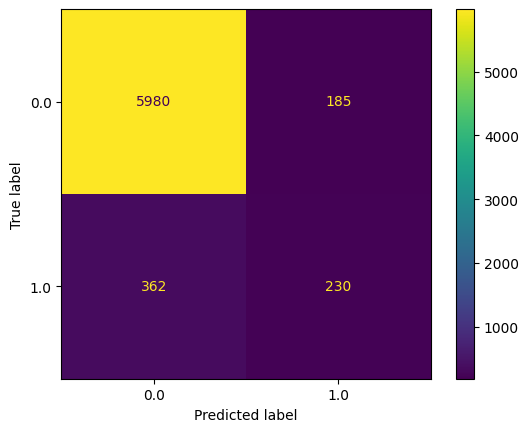

In [38]:
print("Male Subgroup Performance:")
accuracy = accuracy_score(t_test_male, y_pred_male)
print('Accuracy:', accuracy)

print(classification_report(t_test_male, y_pred_male, digits=4))

matrix = confusion_matrix(t_test_male, y_pred_male, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

Female Subgroup Performance:
Accuracy: 0.92
              precision    recall  f1-score   support

         0.0     0.9458    0.9681    0.9568      2724
         1.0     0.5348    0.3984    0.4566       251

    accuracy                         0.9200      2975
   macro avg     0.7403    0.6832    0.7067      2975
weighted avg     0.9112    0.9200    0.9146      2975



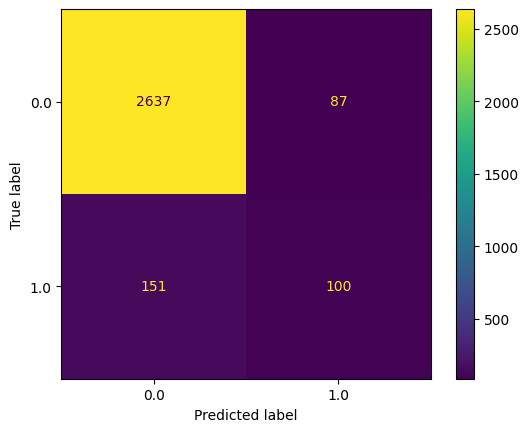

In [39]:
print("Female Subgroup Performance:")
accuracy = accuracy_score(t_test_female, y_pred_female)
print('Accuracy:', accuracy)

print(classification_report(t_test_female, y_pred_female, digits=4))

matrix = confusion_matrix(t_test_female, y_pred_female, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

In [40]:
# Subgroup Performance Comparison
print("\n Male Subgroup Performance：")
print(classification_report(t_test_male, y_pred_male, digits=4))

print("\n Female Subgroup Performance：")
print(classification_report(t_test_female, y_pred_female, digits=4))

# accuracy
male_acc = accuracy_score(t_test_male, y_pred_male)
female_acc = accuracy_score(t_test_female, y_pred_female)

# confusion Matrix: [TN, FP], [FN, TP]
male_cm = confusion_matrix(t_test_male, y_pred_male)
female_cm = confusion_matrix(t_test_female, y_pred_female)

# Male FPR and FNR
male_TN, male_FP = male_cm[0]
male_FN, male_TP = male_cm[1]

male_fpr = male_FP / (male_FP + male_TN + 1e-10)
male_fnr = male_FN / (male_FN + male_TP + 1e-10)

# Female FPR and FNR
female_TN, female_FP = female_cm[0]
female_FN, female_TP = female_cm[1]

female_fpr = female_FP / (female_FP + female_TN + 1e-10)
female_fnr = female_FN / (female_FN + female_TP + 1e-10)

print("\n")
print(f"Accuracy (ACC):")
print(f"Male Accuracy: {male_acc:.4f}")
print(f"Female Accuracy: {female_acc:.4f}")
print(f"Accuracy Difference（Gender Gap）: {abs(male_acc - female_acc):.4f}")
print("\n")
print(f"False Positive Rate (FPR):")
print(f"Male FPR:   {male_fpr:.4f}")
print(f"Female FPR: {female_fpr:.4f}")
print(f"FPR Gender Gap: {abs(male_fpr - female_fpr):.4f}")
print("\n")
print(f"False Negative Rate (FNR):")
print(f"Male FNR:   {male_fnr:.4f}")
print(f"Female FNR: {female_fnr:.4f}")
print(f"FNR Gender Gap: {abs(male_fnr - female_fnr):.4f}")


 Male Subgroup Performance：
              precision    recall  f1-score   support

         0.0     0.9429    0.9700    0.9563      6165
         1.0     0.5542    0.3885    0.4568       592

    accuracy                         0.9190      6757
   macro avg     0.7486    0.6793    0.7065      6757
weighted avg     0.9089    0.9190    0.9125      6757


 Female Subgroup Performance：
              precision    recall  f1-score   support

         0.0     0.9458    0.9681    0.9568      2724
         1.0     0.5348    0.3984    0.4566       251

    accuracy                         0.9200      2975
   macro avg     0.7403    0.6832    0.7067      2975
weighted avg     0.9112    0.9200    0.9146      2975



Accuracy (ACC):
Male Accuracy: 0.9190
Female Accuracy: 0.9200
Accuracy Difference（Gender Gap）: 0.0010


False Positive Rate (FPR):
Male FPR:   0.0300
Female FPR: 0.0319
FPR Gender Gap: 0.0019


False Negative Rate (FNR):
Male FNR:   0.6115
Female FNR: 0.6016
FNR Gender Gap: 0.0099


## Section 8: New approach

In [41]:
# Extract Demographic Information from Training Dataset
X_train_demographic = X_train_norm[:, 1:52]
print(X_train_demographic.shape)

# Save the Data
np.save(os.path.join(ROOT, "content", "X_train_demographic.npy"), X_train_demographic)

# Subgroup Number
k = 2

# Build Subgroup Classfication
model_4 = KMeans(n_clusters=k, random_state=88)

# Fit Model
cluster_labels_train = model_4.fit_predict(X_train_demographic)

# Save the labels from clusters
np.save(os.path.join(ROOT, "content", "cluster_labels_train.npy"), cluster_labels_train)

joblib.dump(model_4, os.path.join(ROOT, 'models', 'model_kmeans.pkl'))

(38928, 51)


['c:\\Data\\Canada\\Study\\masters\\CSI5195 - Ethics in AI\\Project\\models\\model_kmeans.pkl']

In [42]:
print("Sample number in each subgroup:")

for cluster_id in np.unique(cluster_labels_train):

    cluster_mask = cluster_labels_train == cluster_id
    X_cluster = X_train_norm[cluster_mask]
    number_subgroup = len(X_cluster)
    print("Subgroup " + str(cluster_id) + " has " + str(number_subgroup) + " data")

Sample number in each subgroup:
Subgroup 0 has 15411 data
Subgroup 1 has 23517 data


In [43]:
cluster_models = {}

for cluster_id in np.unique(cluster_labels_train):


    cluster_mask = cluster_labels_train == cluster_id

    X_cluster = X_train_no_gender[cluster_mask]
    y_cluster = t_train_no_gender[cluster_mask]
    number_subgroup = len(X_cluster)

    print("Subgroup " + str(cluster_id) + " has " + str(number_subgroup) + " data")

    # train MLP for each subgroup
    subgroup_model_1 = MLPClassifier(activation='relu', hidden_layer_sizes=(128,), learning_rate_init=0.001, random_state=88)
    subgroup_model_1.fit(X_cluster, y_cluster)

    # save model
    cluster_models[cluster_id] = subgroup_model_1
    print(f"Cluster {cluster_id} is trained by using {X_cluster.shape[0]} data")
    print("\n")

Subgroup 0 has 15411 data


c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cluster 0 is trained by using 15411 data


Subgroup 1 has 23517 data
Cluster 1 is trained by using 23517 data




c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [44]:
X_test_demographic = X_test_norm[:, 1:52]
np.save(os.path.join(ROOT, "content", "X_test_demographic.npy"), X_test_demographic)
cluster_labels_test = model_4.predict(X_test_demographic)


y_pred_clustered = np.zeros_like(t_test_no_gender)


for cluster_id in np.unique(cluster_labels_test):

    cluster_mask_1 = cluster_labels_test == cluster_id

    X_cluster_test = X_test_no_gender[cluster_mask_1]


    classification_model = cluster_models[cluster_id]

    # Save the model
    joblib.dump(classification_model, os.path.join(ROOT, 'models', f'model_cluster_{cluster_id}_kmeans.pkl'))

    y_pred_1 = classification_model.predict(X_cluster_test)

    y_pred_clustered[cluster_mask_1] = y_pred_1

In [45]:
print(y_pred_clustered.shape)
print(t_test_no_gender.shape)

(9732,)
(9732,)




Overall Performance:
Accuracy: 0.9260172626387176


              precision    recall  f1-score   support

         0.0     0.9429    0.9783    0.9602      8889
         1.0     0.6208    0.3749    0.4675       843

    accuracy                         0.9260      9732
   macro avg     0.7818    0.6766    0.7139      9732
weighted avg     0.9150    0.9260    0.9176      9732



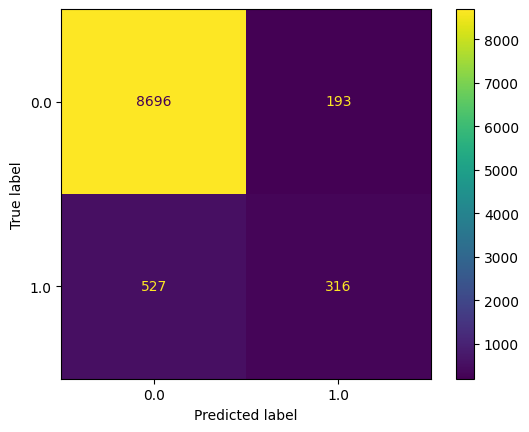

In [46]:
print("\n")
print("Overall Performance:")
accuracy = accuracy_score(t_test_no_gender, y_pred_clustered)
print('Accuracy:', accuracy)
print("\n")

# f1 = f1_score(t_test_no_gender, y_pred)
# print('F1-score:', f1)

print(classification_report(t_test_no_gender, y_pred_clustered, digits=4))

matrix = confusion_matrix(t_test_no_gender, y_pred_clustered, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

In [47]:
# Mask Creation
male_mask = t_test_gender == 0
female_mask = t_test_gender == 1

# Male Subgroup
t_test_male = t_test_no_gender[male_mask]
y_pred_male = y_pred_clustered[male_mask]

# Female Subgroup
t_test_female = t_test_no_gender[female_mask]
y_pred_female = y_pred_clustered[female_mask]

Male Subgroup Performance:
Accuracy: 0.9264466479206749
              precision    recall  f1-score   support

         0.0     0.9430    0.9786    0.9604      6165
         1.0     0.6323    0.3834    0.4774       592

    accuracy                         0.9264      6757
   macro avg     0.7876    0.6810    0.7189      6757
weighted avg     0.9157    0.9264    0.9181      6757



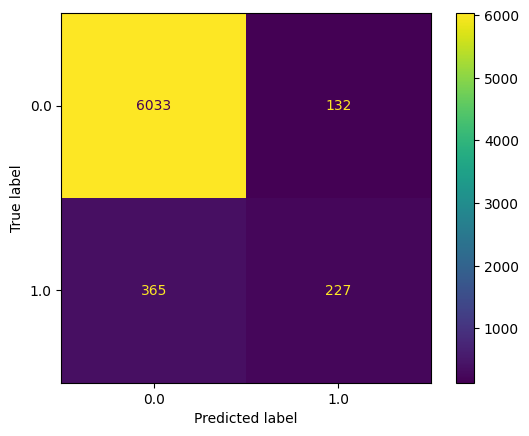

In [48]:
print("Male Subgroup Performance:")
accuracy = accuracy_score(t_test_male, y_pred_male)
print('Accuracy:', accuracy)

print(classification_report(t_test_male, y_pred_male, digits=4))

matrix = confusion_matrix(t_test_male, y_pred_male, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

Female Subgroup Performance:
Accuracy: 0.9250420168067227
              precision    recall  f1-score   support

         0.0     0.9427    0.9776    0.9598      2724
         1.0     0.5933    0.3546    0.4439       251

    accuracy                         0.9250      2975
   macro avg     0.7680    0.6661    0.7019      2975
weighted avg     0.9132    0.9250    0.9163      2975



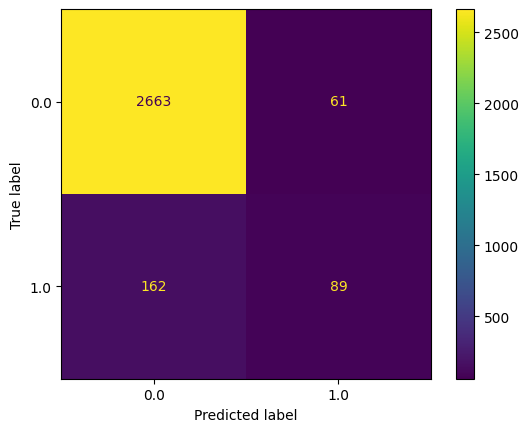

In [49]:
print("Female Subgroup Performance:")
accuracy = accuracy_score(t_test_female, y_pred_female)
print('Accuracy:', accuracy)

print(classification_report(t_test_female, y_pred_female, digits=4))

matrix = confusion_matrix(t_test_female, y_pred_female, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

In [50]:
# Subgroup Performance Comparison
print("\n Male Subgroup Performance：")
print(classification_report(t_test_male, y_pred_male, digits=4))

print("\n Female Subgroup Performance：")
print(classification_report(t_test_female, y_pred_female, digits=4))

# accuracy
male_acc = accuracy_score(t_test_male, y_pred_male)
female_acc = accuracy_score(t_test_female, y_pred_female)

# confusion Matrix: [TN, FP], [FN, TP]
male_cm = confusion_matrix(t_test_male, y_pred_male)
female_cm = confusion_matrix(t_test_female, y_pred_female)

# Male FPR and FNR
male_TN, male_FP = male_cm[0]
male_FN, male_TP = male_cm[1]

male_fpr = male_FP / (male_FP + male_TN + 1e-10)
male_fnr = male_FN / (male_FN + male_TP + 1e-10)

# Female FPR and FNR
female_TN, female_FP = female_cm[0]
female_FN, female_TP = female_cm[1]

female_fpr = female_FP / (female_FP + female_TN + 1e-10)
female_fnr = female_FN / (female_FN + female_TP + 1e-10)

print("\n")
print(f"Accuracy (ACC):")
print(f"Male Accuracy: {male_acc:.4f}")
print(f"Female Accuracy: {female_acc:.4f}")
print(f"Accuracy Difference（Gender Gap）: {abs(male_acc - female_acc):.4f}")
print("\n")
print(f"False Positive Rate (FPR):")
print(f"Male FPR:   {male_fpr:.4f}")
print(f"Female FPR: {female_fpr:.4f}")
print(f"FPR Gender Gap: {abs(male_fpr - female_fpr):.4f}")
print("\n")
print(f"False Negative Rate (FNR):")
print(f"Male FNR:   {male_fnr:.4f}")
print(f"Female FNR: {female_fnr:.4f}")
print(f"FNR Gender Gap: {abs(male_fnr - female_fnr):.4f}")


 Male Subgroup Performance：
              precision    recall  f1-score   support

         0.0     0.9430    0.9786    0.9604      6165
         1.0     0.6323    0.3834    0.4774       592

    accuracy                         0.9264      6757
   macro avg     0.7876    0.6810    0.7189      6757
weighted avg     0.9157    0.9264    0.9181      6757


 Female Subgroup Performance：
              precision    recall  f1-score   support

         0.0     0.9427    0.9776    0.9598      2724
         1.0     0.5933    0.3546    0.4439       251

    accuracy                         0.9250      2975
   macro avg     0.7680    0.6661    0.7019      2975
weighted avg     0.9132    0.9250    0.9163      2975



Accuracy (ACC):
Male Accuracy: 0.9264
Female Accuracy: 0.9250
Accuracy Difference（Gender Gap）: 0.0014


False Positive Rate (FPR):
Male FPR:   0.0214
Female FPR: 0.0224
FPR Gender Gap: 0.0010


False Negative Rate (FNR):
Male FNR:   0.6166
Female FNR: 0.6454
FNR Gender Gap: 0.0289


## Section 9: Out-of-Distribution Example part 1

In [51]:
X_train, X_test, t_train, t_test = train_test_split(data_total, output_Y, test_size=0.2, random_state=66)

# female: 1      male: 0
X_train[:, 0] = (X_train[:, 0] == 'f').astype(int)
t_train[:, 0] = (t_train[:, 0] == 'f').astype(int)

X_test[:, 0] = (X_test[:, 0] == 'f').astype(int)
t_test[:, 0] = (t_test[:, 0] == 'f').astype(int)

In [52]:
female_promoted_mask = (t_train[:, 0] == 1) & (t_train[:, 1].astype(int) == 1)  #boolean value
female_promoted_indices = np.where(female_promoted_mask)[0]   # 1112 length

np.random.seed(18)
indices_to_remove = np.random.choice(female_promoted_indices, size=1000, replace=False)


X_train_modified = np.delete(X_train, indices_to_remove, axis=0)
t_train_modified = np.delete(t_train, indices_to_remove, axis=0)

print("New Training Dataset Shape:")
print(f"X_train_modified: {X_train_modified.shape}, t_train_modified: {t_train_modified.shape}")

New Training Dataset Shape:
X_train_modified: (37928, 105), t_train_modified: (37928, 2)


In [53]:
mean = X_train_modified[:, 2:4].astype(float).mean(axis=0)
std  = X_train_modified[:, 2:4].astype(float).std(axis=0)

X_train_norm = X_train_modified.copy()
X_test_norm = X_test.copy()

X_train_norm[:, 2:4] = (X_train_modified[:, 2:4] - mean) / std
X_test_norm[:, 2:4] = (X_test[:, 2:4] - mean) / std


print(X_train_norm[:, 2:4].astype(float).mean(axis=0)) # Should be all very close to 0
print(X_train_norm[:, 2:4].astype(float).std(axis=0))  # Should be all very close to 1
print(X_test_norm[:, 2:4].astype(float).mean(axis=0)) # Should be close to 0
print(X_test_norm[:, 2:4].astype(float).std(axis=0))  # Should be close to 1

[6.85072707e-16 2.47054480e-18]
[1. 1.]
[0.01686809 0.0170799 ]
[1.01401958 1.00256678]


In [54]:
X_train_no_gender = X_train_norm[:, 1:].astype(float)
X_test_no_gender = X_test_norm[:, 1:].astype(float)

t_train_gender = t_train_modified[:, 0].astype(float)
t_test_gender  = t_test[:, 0].astype(float)

t_train_no_gender = t_train_modified[:, 1].astype(float)
t_test_no_gender = t_test[:, 1].astype(float)

print(X_train_norm.shape)
print(X_test_norm.shape)
print(t_train_modified.shape)
print(t_test.shape)

print("\n")
print(X_train_no_gender.shape)
print(X_test_no_gender.shape)

print("\n")
print(t_train_gender.shape)
print(t_test_gender.shape)
print(t_train_no_gender.shape)
print(t_test_no_gender.shape)

(37928, 105)
(9732, 105)
(37928, 2)
(9732, 2)


(37928, 104)
(9732, 104)


(37928,)
(9732,)
(37928,)
(9732,)


In [55]:
print(np.isnan(X_train_no_gender).any())
print(np.isinf(X_train_no_gender).any())
print(np.isnan(X_test_no_gender).any())
print(np.isinf(X_test_no_gender).any())

print(np.isnan(t_train_no_gender).any())
print(np.isinf(t_train_no_gender).any())
print(np.isnan(t_test_no_gender).any())
print(np.isinf(t_test_no_gender).any())

False
False
False
False
False
False
False
False


In [56]:
print(X_train_no_gender)
print(t_train_gender)
print(t_train_no_gender)

[[ 1.          0.05682405  0.95566671 ...  0.          1.
   0.        ]
 [ 1.         -0.20887559  0.42545992 ...  0.          1.
   0.        ]
 [ 1.          0.4553735  -0.93792898 ...  0.          1.
   0.        ]
 ...
 [ 1.          0.72107314 -0.02900305 ...  0.          1.
   0.        ]
 [ 1.         -0.47457522  1.4858735  ...  0.          1.
   0.        ]
 [ 1.         -1.00597449  1.63736115 ...  0.          1.
   0.        ]]
[1. 0. 0. ... 1. 0. 1.]
[0. 0. 0. ... 0. 0. 0.]


In [57]:
print(X_test_no_gender)
print(t_test_gender)
print(t_test_no_gender)

[[ 1.         -0.07602577 -0.1804907  ...  0.          1.
   0.        ]
 [ 1.         -0.74027486  0.50120374 ...  0.          1.
   0.        ]
 [ 1.         -0.60742504 -1.0136728  ...  0.          1.
   0.        ]
 ...
 [ 1.         -0.74027486 -0.71069749 ...  0.          1.
   0.        ]
 [ 1.         -1.53737377 -1.16516046 ...  0.          1.
   0.        ]
 [ 1.         -0.87312468  1.86459264 ...  0.          1.
   0.        ]]
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 1.]


In [58]:
new_df_0 = pd.DataFrame({
    'gender': X_train_norm[:, 0],
    'is_promoted': t_train_no_gender
})

# Promotion Distribution in Train Dataset
print("is_promoted vs Gender (Male):")
print(new_df_0[new_df_0['gender'] == 0]['is_promoted'].value_counts())

print("\nis_promoted vs Gender (Female):")
print(new_df_0[new_df_0['gender'] == 1]['is_promoted'].value_counts())

# Gender Distribution in Train Dataset
print("\ngender vs class 0 (No Promoted):")
print(new_df_0[new_df_0['is_promoted'] == 0]['gender'].value_counts())

print("\ngender vs class 1 (Promoted):")
print(new_df_0[new_df_0['is_promoted'] == 1]['gender'].value_counts())

is_promoted vs Gender (Male):
is_promoted
0.0    24818
1.0     2277
Name: count, dtype: int64

is_promoted vs Gender (Female):
is_promoted
0.0    10721
1.0      112
Name: count, dtype: int64

gender vs class 0 (No Promoted):
gender
0    24818
1    10721
Name: count, dtype: int64

gender vs class 1 (Promoted):
gender
0    2277
1     112
Name: count, dtype: int64


In [59]:
new_df_1 = pd.DataFrame({
    'gender': X_test_norm[:, 0],
    'is_promoted': t_test_no_gender
})

# Promotion Distribution in Test Dataset
print("is_promoted vs Gender (Male):")
print(new_df_1[new_df_1['gender'] == 0]['is_promoted'].value_counts())

print("\nis_promoted vs Gender (Female):")
print(new_df_1[new_df_1['gender'] == 1]['is_promoted'].value_counts())

# Gender Distribution in Test Dataset
print("\ngender vs class 0 (No Promoted):")
print(new_df_1[new_df_1['is_promoted'] == 0]['gender'].value_counts())

print("\ngender vs class 1 (Promoted):")
print(new_df_1[new_df_1['is_promoted'] == 1]['gender'].value_counts())

is_promoted vs Gender (Male):
is_promoted
0.0    6165
1.0     592
Name: count, dtype: int64

is_promoted vs Gender (Female):
is_promoted
0.0    2724
1.0     251
Name: count, dtype: int64

gender vs class 0 (No Promoted):
gender
0    6165
1    2724
Name: count, dtype: int64

gender vs class 1 (Promoted):
gender
0    592
1    251
Name: count, dtype: int64


## Section 9: Out-of-Distribution Example part 2

In [60]:
# Train Model

c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Model MLP has been trained with the best parameters
Training time: 41.78 seconds


Overall Performance:
Accuracy: 0.9182079736950267


              precision    recall  f1-score   support

         0.0     0.9402    0.9723    0.9560      8889
         1.0     0.5436    0.3476    0.4240       843

    accuracy                         0.9182      9732
   macro avg     0.7419    0.6599    0.6900      9732
weighted avg     0.9058    0.9182    0.9099      9732



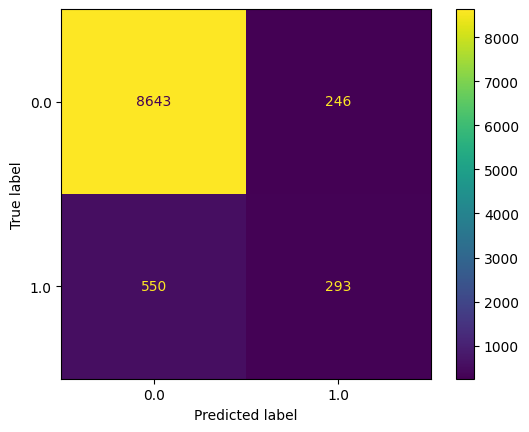

In [61]:
final_model_10 = MLPClassifier(activation='relu', hidden_layer_sizes=(128,), learning_rate_init=0.001, random_state=88)

start_time = time.time()
final_model_10.fit(X_train_norm, t_train_no_gender)
end_time = time.time()

joblib.dump(final_model_10, os.path.join(ROOT, 'models', 'model_OOD.pkl'))

print("Model MLP has been trained with the best parameters")
print(f"Training time: {end_time - start_time:.2f} seconds")

y_pred = final_model_10.predict(X_test_norm)


print("\n")
print("Overall Performance:")
accuracy = accuracy_score(t_test_no_gender, y_pred)
print('Accuracy:', accuracy)
print("\n")

# f1 = f1_score(t_test_no_gender, y_pred)
# print('F1-score:', f1)

print(classification_report(t_test_no_gender, y_pred, digits=4))

matrix = confusion_matrix(t_test_no_gender, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_10.classes_)
disp.plot()
plt.show()

In [62]:
# Mask Creation
male_mask = t_test_gender == 0
female_mask = t_test_gender == 1

# Male Subgroup
t_test_male = t_test_no_gender[male_mask]
y_pred_male = y_pred[male_mask]

# Female Subgroup
t_test_female = t_test_no_gender[female_mask]
y_pred_female = y_pred[female_mask]

Male Subgroup Performance:
Accuracy: 0.9107592126683439
              precision    recall  f1-score   support

         0.0     0.9421    0.9612    0.9516      6165
         1.0     0.4882    0.3851    0.4306       592

    accuracy                         0.9108      6757
   macro avg     0.7152    0.6732    0.6911      6757
weighted avg     0.9024    0.9108    0.9059      6757



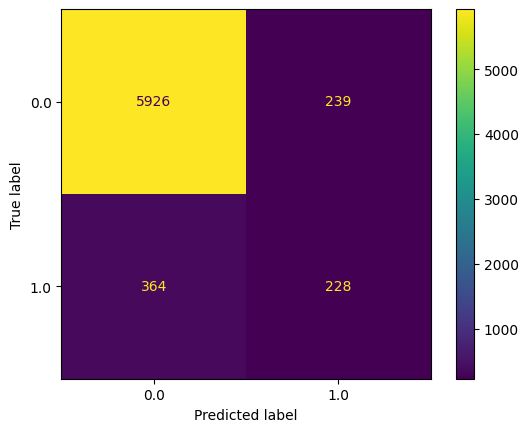

In [63]:
print("Male Subgroup Performance:")
accuracy = accuracy_score(t_test_male, y_pred_male)
print('Accuracy:', accuracy)

print(classification_report(t_test_male, y_pred_male, digits=4))

matrix = confusion_matrix(t_test_male, y_pred_male, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

Female Subgroup Performance:
Accuracy: 0.935126050420168
              precision    recall  f1-score   support

         0.0     0.9359    0.9974    0.9657      2724
         1.0     0.9028    0.2590    0.4025       251

    accuracy                         0.9351      2975
   macro avg     0.9194    0.6282    0.6841      2975
weighted avg     0.9331    0.9351    0.9182      2975



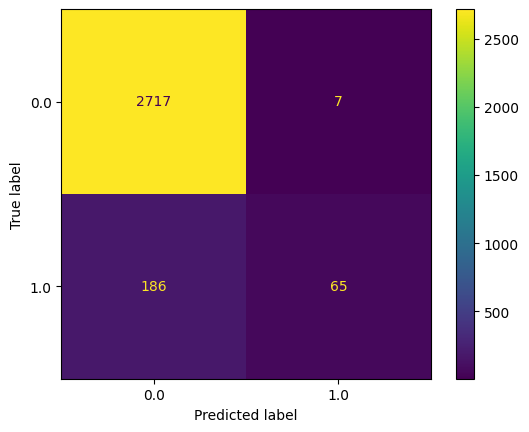

In [64]:
print("Female Subgroup Performance:")
accuracy = accuracy_score(t_test_female, y_pred_female)
print('Accuracy:', accuracy)

print(classification_report(t_test_female, y_pred_female, digits=4))

matrix = confusion_matrix(t_test_female, y_pred_female, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

In [65]:
# Subgroup Performance Comparison
print("\n Male Subgroup Performance：")
print(classification_report(t_test_male, y_pred_male, digits=4))

print("\n Female Subgroup Performance：")
print(classification_report(t_test_female, y_pred_female, digits=4))

# accuracy
male_acc = accuracy_score(t_test_male, y_pred_male)
female_acc = accuracy_score(t_test_female, y_pred_female)

# confusion Matrix: [TN, FP], [FN, TP]
male_cm = confusion_matrix(t_test_male, y_pred_male)
female_cm = confusion_matrix(t_test_female, y_pred_female)

# Male FPR and FNR
male_TN, male_FP = male_cm[0]
male_FN, male_TP = male_cm[1]

male_fpr = male_FP / (male_FP + male_TN + 1e-10)
male_fnr = male_FN / (male_FN + male_TP + 1e-10)

# Female FPR and FNR
female_TN, female_FP = female_cm[0]
female_FN, female_TP = female_cm[1]

female_fpr = female_FP / (female_FP + female_TN + 1e-10)
female_fnr = female_FN / (female_FN + female_TP + 1e-10)

print("\n")
print(f"Accuracy (ACC):")
print(f"Male Accuracy: {male_acc:.4f}")
print(f"Female Accuracy: {female_acc:.4f}")
print(f"Accuracy Difference（Gender Gap）: {abs(male_acc - female_acc):.4f}")
print("\n")
print(f"False Positive Rate (FPR):")
print(f"Male FPR:   {male_fpr:.4f}")
print(f"Female FPR: {female_fpr:.4f}")
print(f"FPR Gender Gap: {abs(male_fpr - female_fpr):.4f}")
print("\n")
print(f"False Negative Rate (FNR):")
print(f"Male FNR:   {male_fnr:.4f}")
print(f"Female FNR: {female_fnr:.4f}")
print(f"FNR Gender Gap: {abs(male_fnr - female_fnr):.4f}")


 Male Subgroup Performance：
              precision    recall  f1-score   support

         0.0     0.9421    0.9612    0.9516      6165
         1.0     0.4882    0.3851    0.4306       592

    accuracy                         0.9108      6757
   macro avg     0.7152    0.6732    0.6911      6757
weighted avg     0.9024    0.9108    0.9059      6757


 Female Subgroup Performance：
              precision    recall  f1-score   support

         0.0     0.9359    0.9974    0.9657      2724
         1.0     0.9028    0.2590    0.4025       251

    accuracy                         0.9351      2975
   macro avg     0.9194    0.6282    0.6841      2975
weighted avg     0.9331    0.9351    0.9182      2975



Accuracy (ACC):
Male Accuracy: 0.9108
Female Accuracy: 0.9351
Accuracy Difference（Gender Gap）: 0.0244


False Positive Rate (FPR):
Male FPR:   0.0388
Female FPR: 0.0026
FPR Gender Gap: 0.0362


False Negative Rate (FNR):
Male FNR:   0.6149
Female FNR: 0.7410
FNR Gender Gap: 0.1262


## Section 9.3: New approach

In [66]:
# Extract Demographic Information from Training Dataset
X_train_demographic = X_train_norm[:, 1:52]
print(X_train_demographic.shape)

# Subgroup Number
k = 2

# Build Subgroup Classfication
model_5 = KMeans(n_clusters=k, random_state=88)

# Fit Model
cluster_labels_train = model_5.fit_predict(X_train_demographic)

joblib.dump(model_5, os.path.join(ROOT, 'models', 'model_kmeans_OOD.pkl'))

(37928, 51)


['c:\\Data\\Canada\\Study\\masters\\CSI5195 - Ethics in AI\\Project\\models\\model_kmeans_OOD.pkl']

In [67]:
print("Sample number in each subgroup:")

for cluster_id in np.unique(cluster_labels_train):

    cluster_mask = cluster_labels_train == cluster_id
    X_cluster = X_train_norm[cluster_mask]
    number_subgroup = len(X_cluster)
    print("Subgroup " + str(cluster_id) + " has " + str(number_subgroup) + " data")

Sample number in each subgroup:
Subgroup 0 has 23154 data
Subgroup 1 has 14774 data


In [68]:
cluster_models = {}

for cluster_id in np.unique(cluster_labels_train):


    cluster_mask = cluster_labels_train == cluster_id

    X_cluster = X_train_no_gender[cluster_mask]
    y_cluster = t_train_no_gender[cluster_mask]
    number_subgroup = len(X_cluster)

    print("Subgroup " + str(cluster_id) + " has " + str(number_subgroup) + " data")

    # train MLP for each subgroup
    subgroup_model_2 = MLPClassifier(activation='relu', hidden_layer_sizes=(128,), learning_rate_init=0.001, random_state=88)
    subgroup_model_2.fit(X_cluster, y_cluster)

    # save model
    cluster_models[cluster_id] = subgroup_model_2
    print(f"Cluster {cluster_id} is trained by using {X_cluster.shape[0]} data")
    print("\n")

Subgroup 0 has 23154 data


c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Cluster 0 is trained by using 23154 data


Subgroup 1 has 14774 data
Cluster 1 is trained by using 14774 data




c:\Data\Canada\Study\masters\CSI5195 - Ethics in AI\Project\.venv\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
X_test_demographic = X_test_norm[:, 1:52]
cluster_labels_test = model_5.predict(X_test_demographic)


y_pred_clustered = np.zeros_like(t_test_no_gender)


for cluster_id in np.unique(cluster_labels_test):

    cluster_mask_1 = cluster_labels_test == cluster_id

    X_cluster_test = X_test_no_gender[cluster_mask_1]


    classification_model = cluster_models[cluster_id]

    # Save the model
    joblib.dump(classification_model, os.path.join(ROOT, 'models', f'model_cluster_{cluster_id}_OOD.pkl'))

    y_pred_1 = classification_model.predict(X_cluster_test)

    y_pred_clustered[cluster_mask_1] = y_pred_1

In [70]:
print(y_pred_clustered.shape)
print(t_test_no_gender.shape)

(9732,)
(9732,)




Overall Performance:
Accuracy: 0.9255034936292643


              precision    recall  f1-score   support

         0.0     0.9410    0.9799    0.9600      8889
         1.0     0.6239    0.3523    0.4503       843

    accuracy                         0.9255      9732
   macro avg     0.7825    0.6661    0.7052      9732
weighted avg     0.9135    0.9255    0.9159      9732



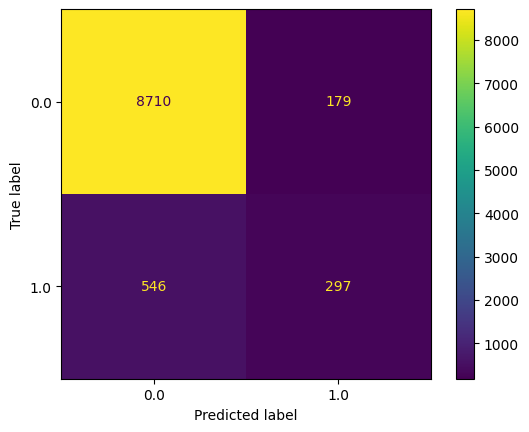

In [71]:
print("\n")
print("Overall Performance:")
accuracy = accuracy_score(t_test_no_gender, y_pred_clustered)
print('Accuracy:', accuracy)
print("\n")

# f1 = f1_score(t_test_no_gender, y_pred)
# print('F1-score:', f1)

print(classification_report(t_test_no_gender, y_pred_clustered, digits=4))

matrix = confusion_matrix(t_test_no_gender, y_pred_clustered, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

In [72]:
# Mask Creation
male_mask = t_test_gender == 0
female_mask = t_test_gender == 1

# Male Subgroup
t_test_male = t_test_no_gender[male_mask]
y_pred_male = y_pred_clustered[male_mask]

# Female Subgroup
t_test_female = t_test_no_gender[female_mask]
y_pred_female = y_pred_clustered[female_mask]

Male Subgroup Performance:
Accuracy: 0.9237827438212224
              precision    recall  f1-score   support

         0.0     0.9403    0.9786    0.9591      6165
         1.0     0.6129    0.3530    0.4480       592

    accuracy                         0.9238      6757
   macro avg     0.7766    0.6658    0.7035      6757
weighted avg     0.9116    0.9238    0.9143      6757



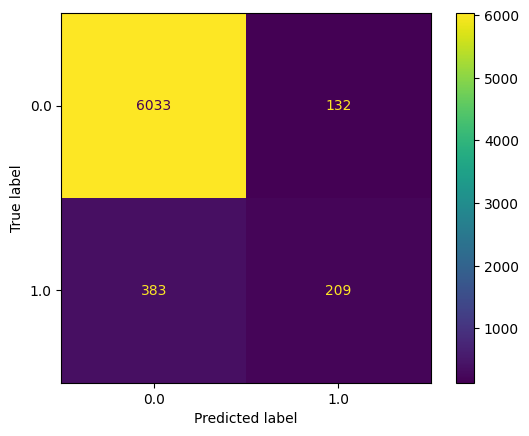

In [73]:
print("Male Subgroup Performance:")
accuracy = accuracy_score(t_test_male, y_pred_male)
print('Accuracy:', accuracy)

print(classification_report(t_test_male, y_pred_male, digits=4))

matrix = confusion_matrix(t_test_male, y_pred_male, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

Female Subgroup Performance:
Accuracy: 0.9294117647058824
              precision    recall  f1-score   support

         0.0     0.9426    0.9827    0.9623      2724
         1.0     0.6519    0.3506    0.4560       251

    accuracy                         0.9294      2975
   macro avg     0.7972    0.6667    0.7091      2975
weighted avg     0.9181    0.9294    0.9195      2975



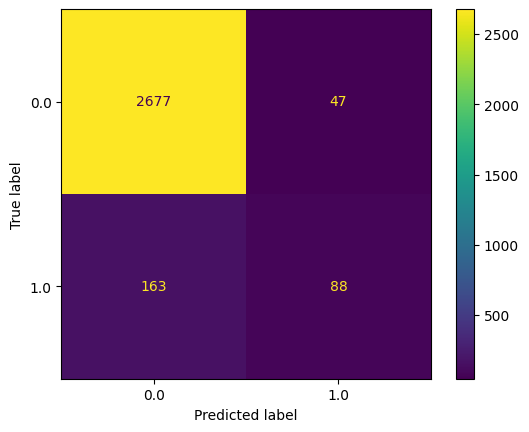

In [74]:
print("Female Subgroup Performance:")
accuracy = accuracy_score(t_test_female, y_pred_female)
print('Accuracy:', accuracy)

print(classification_report(t_test_female, y_pred_female, digits=4))

matrix = confusion_matrix(t_test_female, y_pred_female, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=matrix, display_labels=final_model_1.classes_)
disp.plot()
plt.show()

In [75]:
# Subgroup Performance Comparison
print("\n Male Subgroup Performance：")
print(classification_report(t_test_male, y_pred_male, digits=4))

print("\n Female Subgroup Performance：")
print(classification_report(t_test_female, y_pred_female, digits=4))

# accuracy
male_acc = accuracy_score(t_test_male, y_pred_male)
female_acc = accuracy_score(t_test_female, y_pred_female)

# confusion Matrix: [TN, FP], [FN, TP]
male_cm = confusion_matrix(t_test_male, y_pred_male)
female_cm = confusion_matrix(t_test_female, y_pred_female)

# Male FPR and FNR
male_TN, male_FP = male_cm[0]
male_FN, male_TP = male_cm[1]

male_fpr = male_FP / (male_FP + male_TN + 1e-10)
male_fnr = male_FN / (male_FN + male_TP + 1e-10)

# Female FPR and FNR
female_TN, female_FP = female_cm[0]
female_FN, female_TP = female_cm[1]

female_fpr = female_FP / (female_FP + female_TN + 1e-10)
female_fnr = female_FN / (female_FN + female_TP + 1e-10)

print("\n")
print(f"Accuracy (ACC):")
print(f"Male Accuracy: {male_acc:.4f}")
print(f"Female Accuracy: {female_acc:.4f}")
print(f"Accuracy Difference（Gender Gap）: {abs(male_acc - female_acc):.4f}")
print("\n")
print(f"False Positive Rate (FPR):")
print(f"Male FPR:   {male_fpr:.4f}")
print(f"Female FPR: {female_fpr:.4f}")
print(f"FPR Gender Gap: {abs(male_fpr - female_fpr):.4f}")
print("\n")
print(f"False Negative Rate (FNR):")
print(f"Male FNR:   {male_fnr:.4f}")
print(f"Female FNR: {female_fnr:.4f}")
print(f"FNR Gender Gap: {abs(male_fnr - female_fnr):.4f}")


 Male Subgroup Performance：
              precision    recall  f1-score   support

         0.0     0.9403    0.9786    0.9591      6165
         1.0     0.6129    0.3530    0.4480       592

    accuracy                         0.9238      6757
   macro avg     0.7766    0.6658    0.7035      6757
weighted avg     0.9116    0.9238    0.9143      6757


 Female Subgroup Performance：
              precision    recall  f1-score   support

         0.0     0.9426    0.9827    0.9623      2724
         1.0     0.6519    0.3506    0.4560       251

    accuracy                         0.9294      2975
   macro avg     0.7972    0.6667    0.7091      2975
weighted avg     0.9181    0.9294    0.9195      2975



Accuracy (ACC):
Male Accuracy: 0.9238
Female Accuracy: 0.9294
Accuracy Difference（Gender Gap）: 0.0056


False Positive Rate (FPR):
Male FPR:   0.0214
Female FPR: 0.0173
FPR Gender Gap: 0.0042


False Negative Rate (FNR):
Male FNR:   0.6470
Female FNR: 0.6494
FNR Gender Gap: 0.0024


In [76]:
class_names = np.array(['Not Promoted', 'Promoted'])
# Save the class names
np.save(os.path.join(ROOT, "content", "class_names.npy"), class_names)